In [115]:
# Copyright 2023 DeepMind Technologies Limited
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [ ]:
# Comment out if running from local environment
!pip install --upgrade git+https://github.com/google-deepmind/nuclease_design.git

# Imports, Constants

In [1]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd


from nuclease_design import utils
from nuclease_design import constants
from nuclease_design import plotting


In [2]:
RANDOM_SEED = 226

NUM_BOOTSTRAPS = 15
MIN_NUM_OBSERVATIONS_PER_BIN = 20

In [3]:
DATA_DIR = constants.DATA_DIR

# Supplemental Hit Rate Plots

In [4]:
df = utils.load_all_data(data_dir=DATA_DIR)
df = utils.expand_sublibraries(df)

In [5]:
df.sublibrary_name.unique()

array(['g1_eppcr', 'g2_g1_plate_assay_variants', 'g2_wt_synonyms',
       'g2_single_mutants', 'g2_stratified_sample', 'g2_unmatched',
       'g2_broad_recombination_sampling', 'g2_mbo_dnn_explore',
       'g2_mbo_dnn_exploit', 'g2_hit_recombination', 'g3_wt_synonyms',
       'g3_unmatched', 'g3_single_mutants', 'g3_g1_stratified_sample',
       'g3_g2_plate_assay_variants', 'g3_hit_recombination',
       'g3_a73r_synonyms', 'g3_prosar_high_screen_low',
       'g3_prosar_high_unscreened', 'g3_prosar_low_screen_low',
       'g3_prosar_low_screen_high', 'g3_prosar_high_screen_high',
       'g3_prosar_low_unscreened', 'g3_mbo_dnn_exploit',
       'g3_mbo_dnn_explore', 'g3_loop_explore', 'g4_mbo_seeds',
       'g4_wt_synonyms', 'g4_other', 'zero_shot',
       'g4_g3_plate_assay_variants', 'g4_unmatched', 'g4_a73r_synonyms',
       'g4_g3_hit_constituents', 'prosar+screen_g2_redux',
       'g4_homolog_graft', 'g4_hit_recombination', 'g4_double_synonyms',
       'g4_mbo_dnn', 'g4_mbo_linear'

In [6]:
def make_plot(df, systems, names, reference, palette=None, include_histogram=False):
    plt.figure(figsize=(12, 10))
    df = df[df['sublibrary_name'].isin(systems)].copy()
    rename_dict = dict(zip(systems, names))
    df['library'] = df['sublibrary_name'].apply(rename_dict.get)
    if include_histogram:
      plot_fn = plotting.plot_hit_rate_per_num_mutations_with_histogram
    else:
      plot_fn = plotting.plot_hit_rate_per_num_mutations
    ax = plot_fn(
        df,
        reference_name=reference,
        hue_feature='library',
        hue_order=names,
        palette=palette,
        group_cols=['library', 'num_mutations'],
        random_seed=RANDOM_SEED,
        #fontsize=30
    )
    return ax

## G2

In [7]:
[s for s in df.sublibrary_name.unique() if s.startswith('g2')]

['g2_g1_plate_assay_variants',
 'g2_wt_synonyms',
 'g2_single_mutants',
 'g2_stratified_sample',
 'g2_unmatched',
 'g2_broad_recombination_sampling',
 'g2_mbo_dnn_explore',
 'g2_mbo_dnn_exploit',
 'g2_hit_recombination']

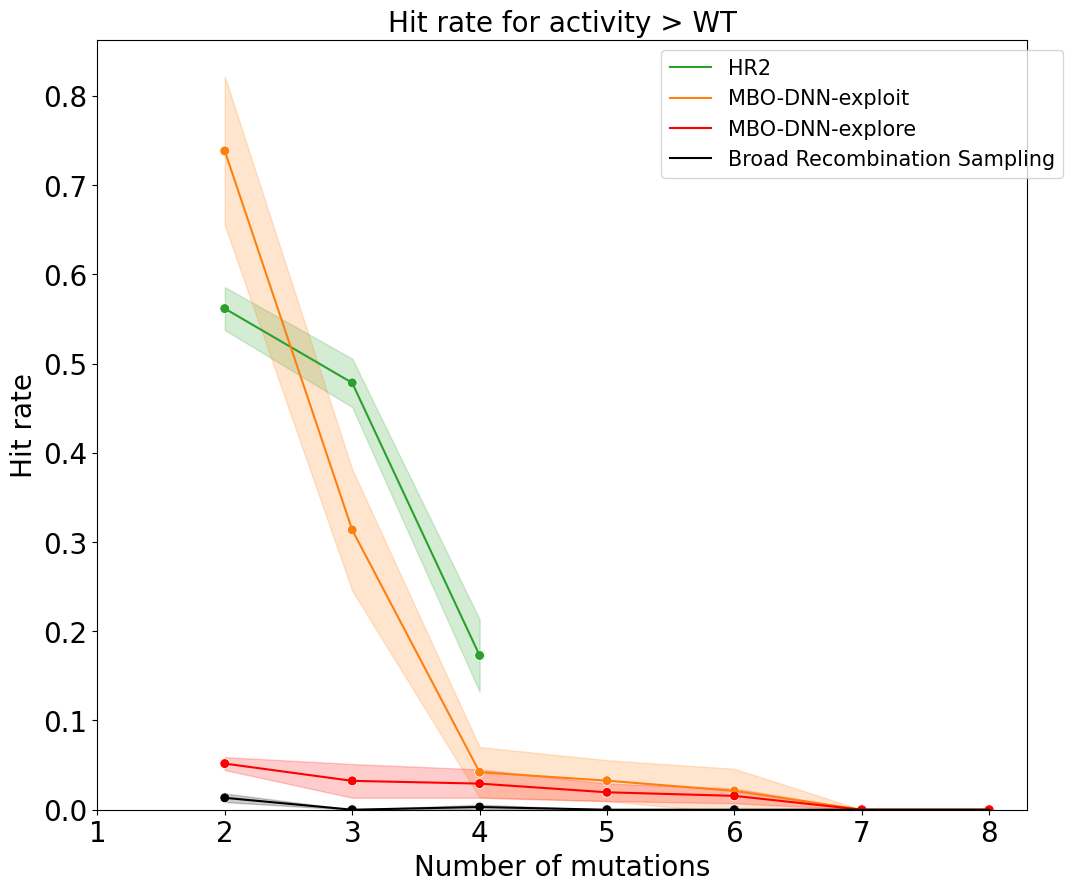

In [8]:
ax = make_plot(
    df,
    ['g2_hit_recombination', 'g2_mbo_dnn_exploit', 'g2_mbo_dnn_explore', 'g2_broad_recombination_sampling'],
    ['HR2', 'MBO-DNN-exploit', 'MBO-DNN-explore', 'Broad Recombination Sampling'],
    'wt',
    [plotting.HR_COLOR, plotting.ML_COLOR, 'red', 'black'],
)
_ = ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

## G3

In [9]:
[s for s in df.sublibrary_name.unique() if s.startswith('g3')]

['g3_wt_synonyms',
 'g3_unmatched',
 'g3_single_mutants',
 'g3_g1_stratified_sample',
 'g3_g2_plate_assay_variants',
 'g3_hit_recombination',
 'g3_a73r_synonyms',
 'g3_prosar_high_screen_low',
 'g3_prosar_high_unscreened',
 'g3_prosar_low_screen_low',
 'g3_prosar_low_screen_high',
 'g3_prosar_high_screen_high',
 'g3_prosar_low_unscreened',
 'g3_mbo_dnn_exploit',
 'g3_mbo_dnn_explore',
 'g3_loop_explore']

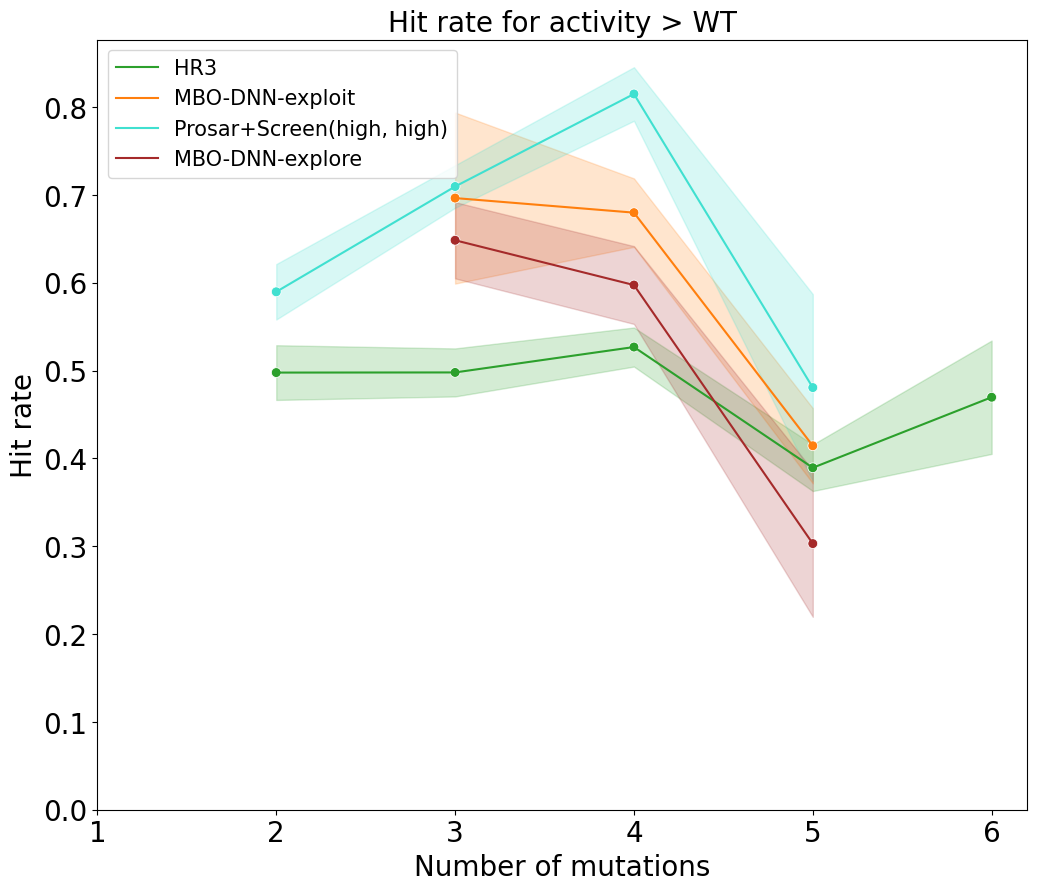

In [10]:
ax = make_plot(
    df,
    ['g3_hit_recombination', 'g3_mbo_dnn_exploit', 'g3_prosar_high_screen_high', 'g3_mbo_dnn_explore'],
    ['HR3', 'MBO-DNN-exploit', 'Prosar+Screen(high, high)', 'MBO-DNN-explore'],    
    'wt',
    [plotting.HR_COLOR, plotting.ML_COLOR, 'turquoise', 'brown'],
    include_histogram=False,
)
_ = ax.legend(fontsize=15)

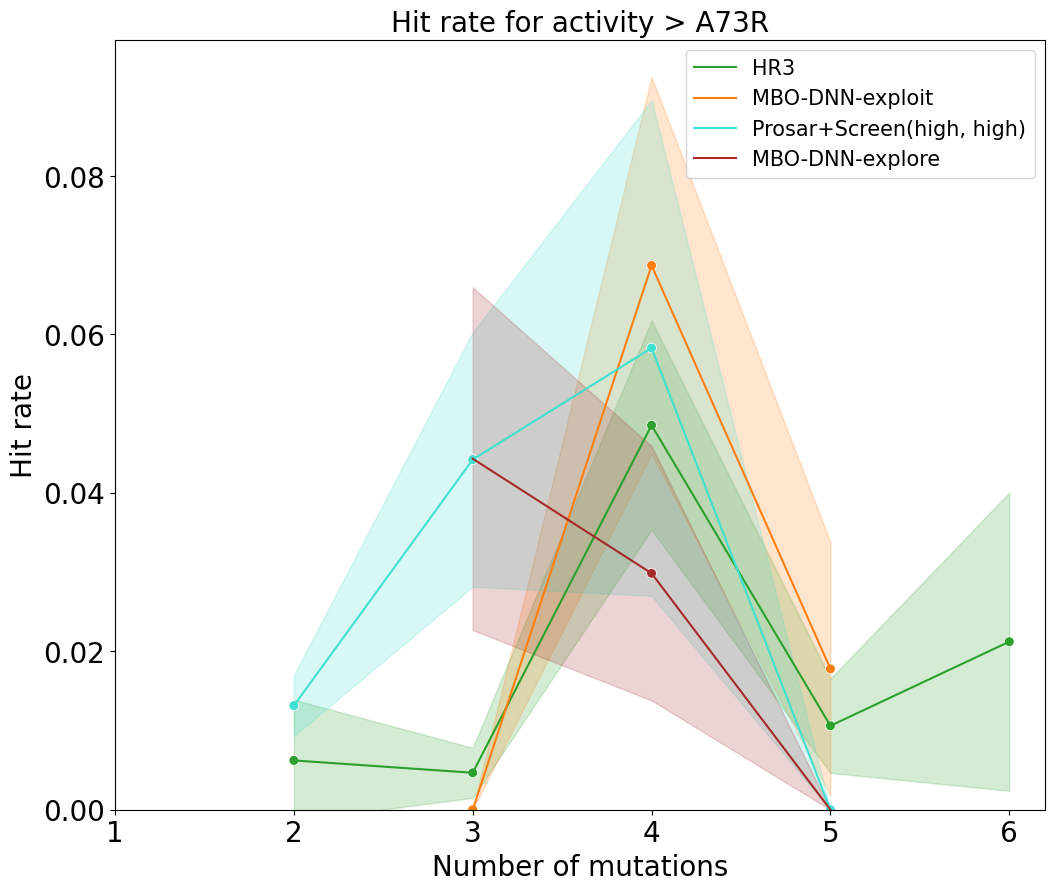

In [11]:
ax = make_plot(
    df,
    ['g3_hit_recombination', 'g3_mbo_dnn_exploit', 'g3_prosar_high_screen_high', 'g3_mbo_dnn_explore'],
    ['HR3', 'MBO-DNN-exploit', 'Prosar+Screen(high, high)', 'MBO-DNN-explore'],        
    'a73r',
    [plotting.HR_COLOR, plotting.ML_COLOR, 'turquoise', 'brown'],
    include_histogram=False,
)
_ = ax.legend(fontsize=15)

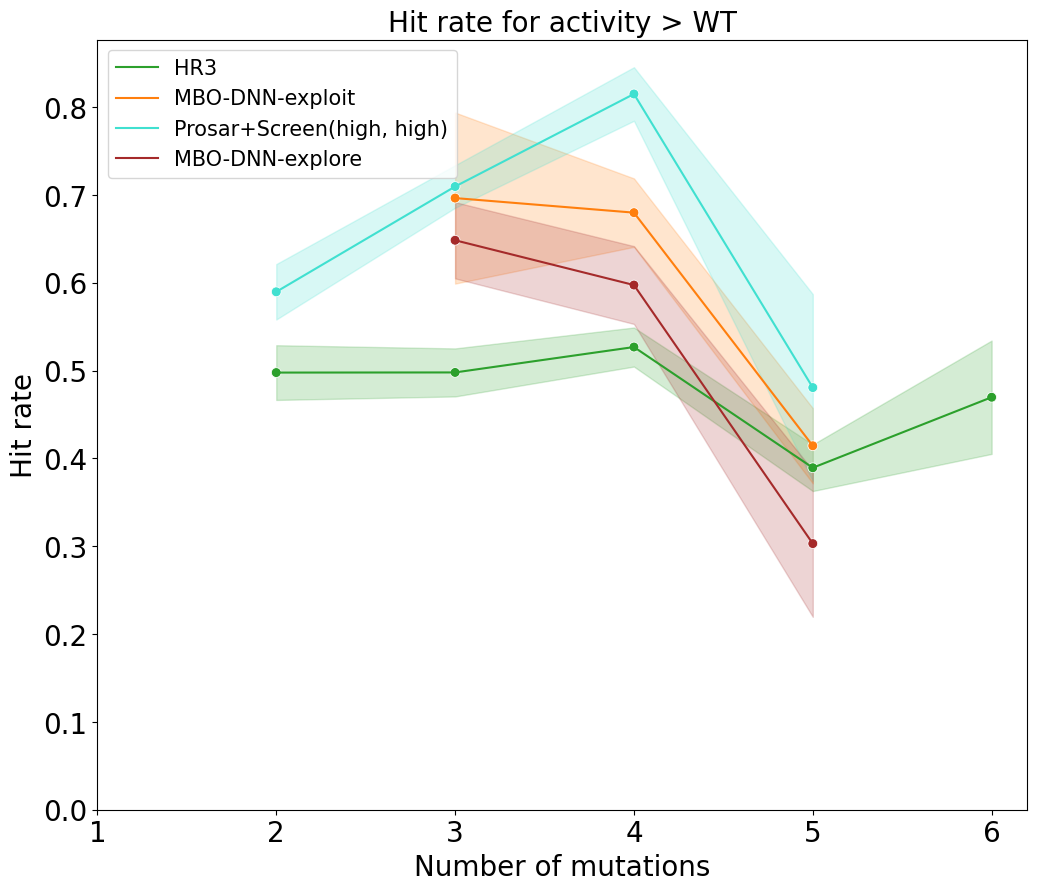

In [12]:
ax = make_plot(
    df,
    ['g3_hit_recombination', 'g3_mbo_dnn_exploit', 'g3_prosar_high_screen_high', 'g3_mbo_dnn_explore'],
    ['HR3', 'MBO-DNN-exploit', 'Prosar+Screen(high, high)', 'MBO-DNN-explore'],        
    'wt',
    [plotting.HR_COLOR, plotting.ML_COLOR, 'turquoise', 'brown'],
    include_histogram=False,
)
_ = ax.legend(fontsize=15)

## Prosar+Screen

In [13]:
[s for s in df.sublibrary_name.unique() if s.startswith('g3') and 'prosar' in s]


['g3_prosar_high_screen_low',
 'g3_prosar_high_unscreened',
 'g3_prosar_low_screen_low',
 'g3_prosar_low_screen_high',
 'g3_prosar_high_screen_high',
 'g3_prosar_low_unscreened']

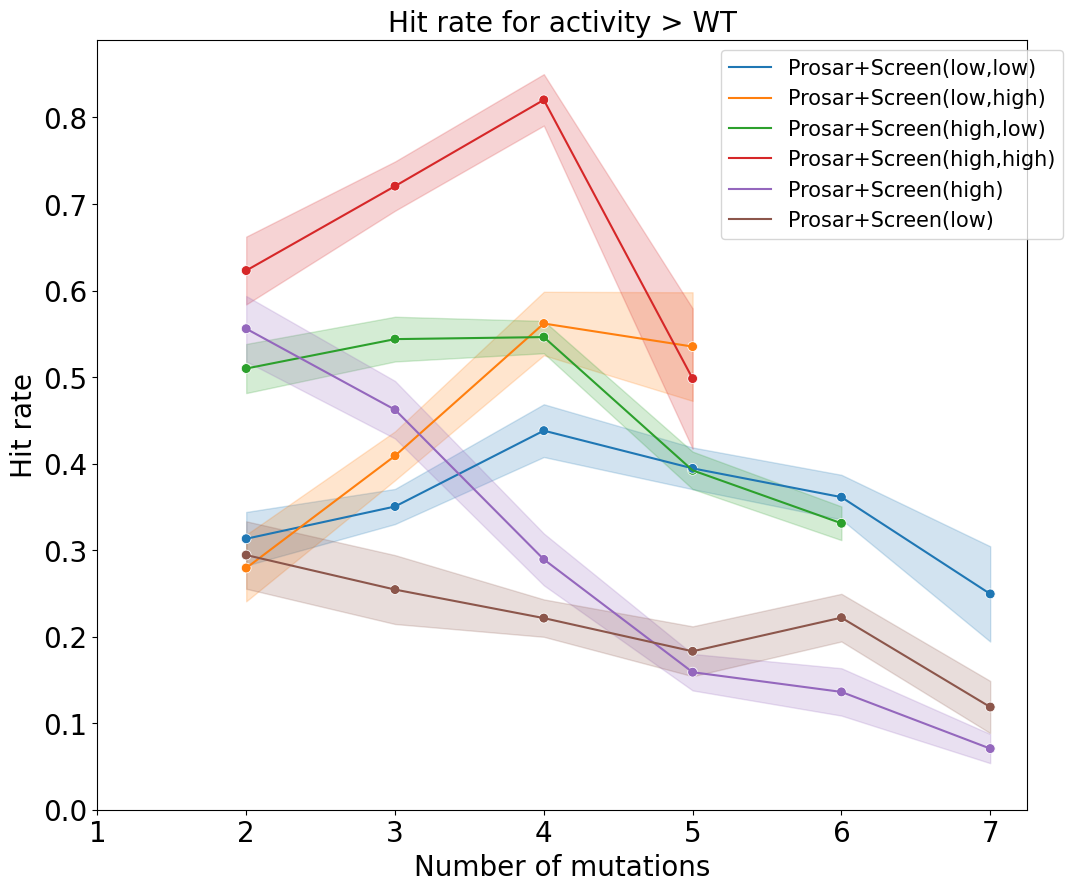

In [14]:
import itertools
prosar_systems, prosar_names = [], []
for t1, t2 in itertools.product(['low', 'high'], ['low', 'high']):
    prosar_systems.append(f'g3_prosar_{t1}_screen_{t2}')
    prosar_names.append(f'Prosar+Screen({t1},{t2})')
prosar_systems.extend(['g3_prosar_high_unscreened', 'g3_prosar_low_unscreened'])
prosar_names.extend(['Prosar+Screen(high)', 'Prosar+Screen(low)'])
ax = make_plot(df, prosar_systems, prosar_names, 'wt')
_ = ax.legend(bbox_to_anchor=(1.05, 1.0), fontsize=15)

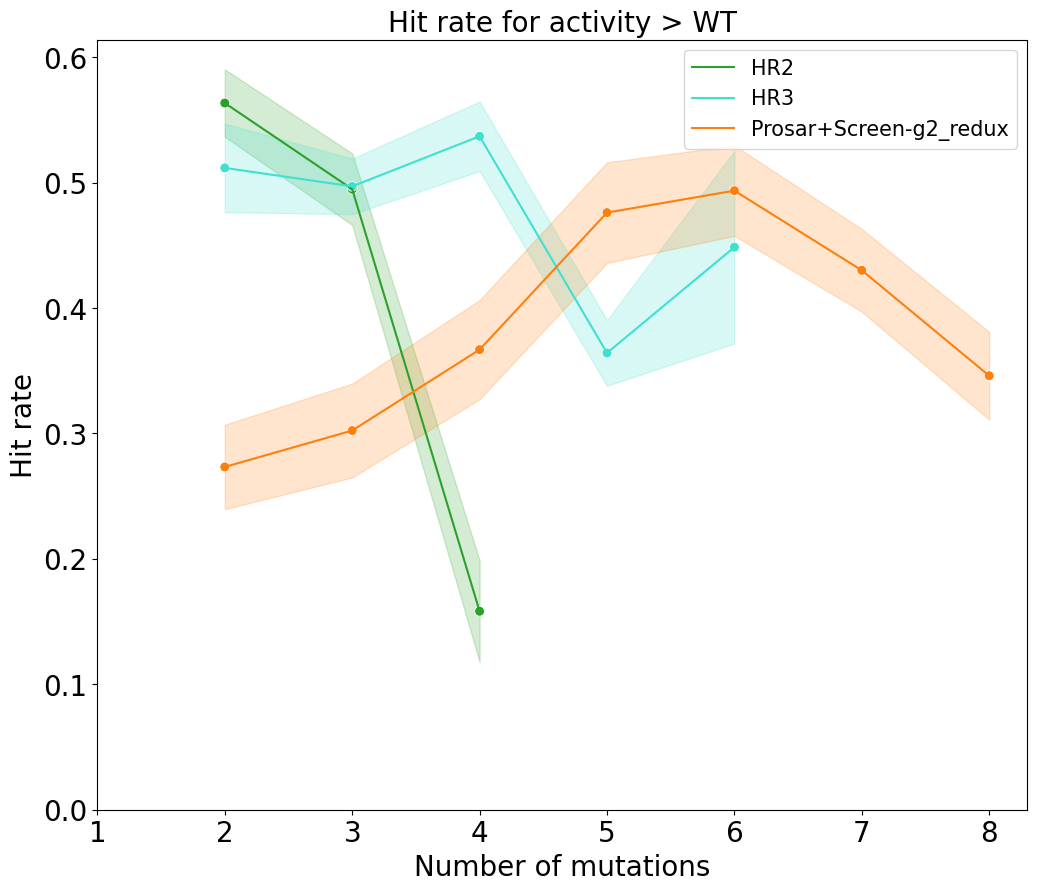

In [15]:
ax = make_plot(
    df,
    [
        'g2_hit_recombination',
        'g3_hit_recombination',
        'prosar+screen_g2_redux',
    ],
    ['HR2', 'HR3', 'Prosar+Screen-g2_redux'],
    'wt',
    [plotting.HR_COLOR, 'turquoise', plotting.ML_COLOR],
)
_ = ax.legend(fontsize=15)

## Sample+Screen

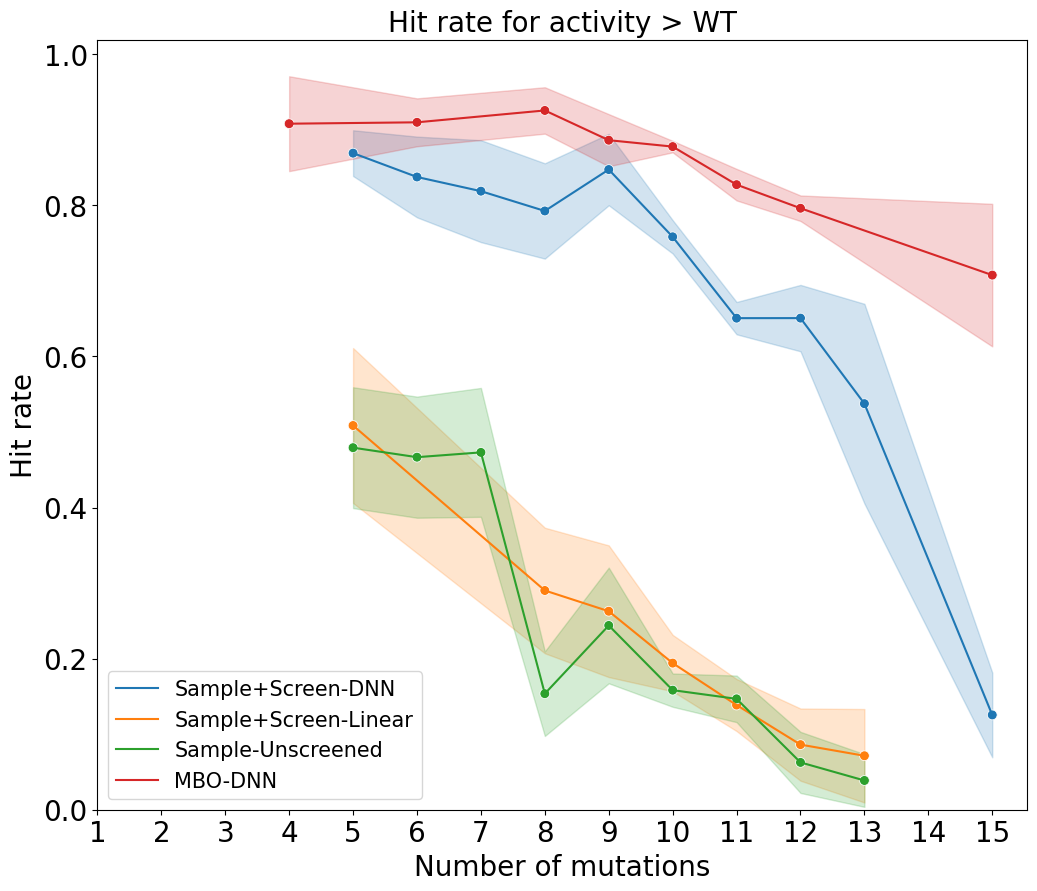

In [16]:
ax = make_plot(df,
               ['g4_sample_and_screen_dnn', 'g4_sample_and_screen_linear', 'g4_sample_unscreened', 'g4_mbo_dnn'],
                ['Sample+Screen-DNN', 'Sample+Screen-Linear', 'Sample-Unscreened', 'MBO-DNN'],
               'wt')
_ = ax.legend(fontsize=15)

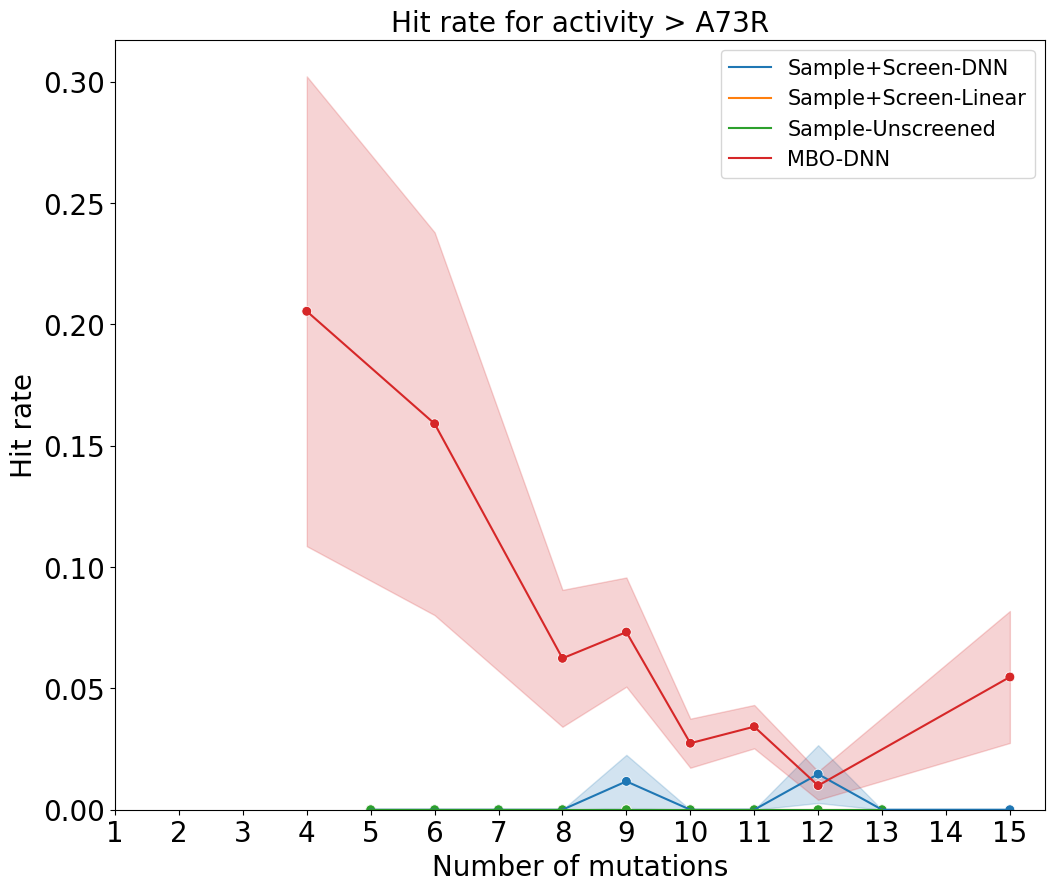

In [17]:
ax = make_plot(df,
               ['g4_sample_and_screen_dnn', 'g4_sample_and_screen_linear', 'g4_sample_unscreened', 'g4_mbo_dnn'],
                ['Sample+Screen-DNN', 'Sample+Screen-Linear', 'Sample-Unscreened', 'MBO-DNN'],
               'a73r')
_ = ax.legend(fontsize=15)

# G3 vs G4 concordance

In [18]:
df = utils.load_all_data(DATA_DIR)

In [19]:
g2df = df[df.generation == 'g2']
g3df = df[df.generation == 'g3']
g4df = df[df.generation == 'g4']

In [20]:
g3g4df = g3df.merge(g4df, on='mutations', how='inner', suffixes=('_g3', '_g4'))

In [21]:
g2g3df = g3df.merge(g2df, on='mutations', how='inner', suffixes=('_g3', '_g2'))

## Confusion matrices g3 vs g4

In [22]:
fiducial = 'neg_control'
pd.crosstab(g3g4df[f'activity_greater_than_{fiducial}_g3'], g3g4df[f'activity_greater_than_{fiducial}_g4'])

activity_greater_than_neg_control_g4,False,True
activity_greater_than_neg_control_g3,,
False,24,10
True,11,206


In [23]:
fiducial = 'wt'
pd.crosstab(g3g4df[f'activity_greater_than_{fiducial}_g3'], g3g4df[f'activity_greater_than_{fiducial}_g4'])

activity_greater_than_wt_g4,False,True
activity_greater_than_wt_g3,,
False,96,21
True,3,131


In [24]:
fiducial = 'a73r'
pd.crosstab(g3g4df[f'activity_greater_than_{fiducial}_g3'], g3g4df[f'activity_greater_than_{fiducial}_g4'])

activity_greater_than_a73r_g4,False
activity_greater_than_a73r_g3,
False,241
True,10


## Plot enrichment factor correlations

In [25]:
g4_efdf = g4df.copy()
g3_efdf = g3df.copy()
g2_efdf = g2df.copy()

In [26]:
g4_cols = ['mutations'] + [utils.get_enrichment_factor_column_name('g4', fiducial) for fiducial in ['neg_control', 'wt', 'a73r']]
g3_cols = ['mutations'] + [utils.get_enrichment_factor_column_name('g3', fiducial) for fiducial in ['neg_control', 'wt']]  # wt and a73r use the same column
g2_cols = ['mutations'] + [utils.get_enrichment_factor_column_name('g2', fiducial) for fiducial in ['neg_control', 'wt']]

In [27]:
merge_efdf = g4_efdf[g4_cols].merge(g3_efdf[g3_cols], on='mutations', how='inner', suffixes=('_g4', '_g3'))

In [28]:
merge_efdf.mutations.nunique()

251

In [29]:
merge_efdf.head()

,mutations,ef_1_70_g4,ef_2_90_g4,ef_4_99.5_g4,ef_1_59_g3,ef_1_80_g3
0,(),1.301032,0.047131,0.148398,1.239270,0.045545
1,"((K, 82, M),)",2.603767,0.687351,0.000000,1.604804,0.618322
2,"((K, 82, A),)",1.216030,0.086258,0.000000,2.050700,0.163062
3,"((K, 75, Y),)",2.736972,0.059901,0.000000,0.805831,0.000000
4,"((R, 136, K),)",1.619410,0.000000,0.000000,0.577037,0.000000


In [30]:
fiducial_to_title = {
    'neg_control': 'low threshold sort\n(negative control fiducial)',
    'wt': 'high threshold sort\n(wildtype fiducial)',
    'a73r': 'A73R'
}

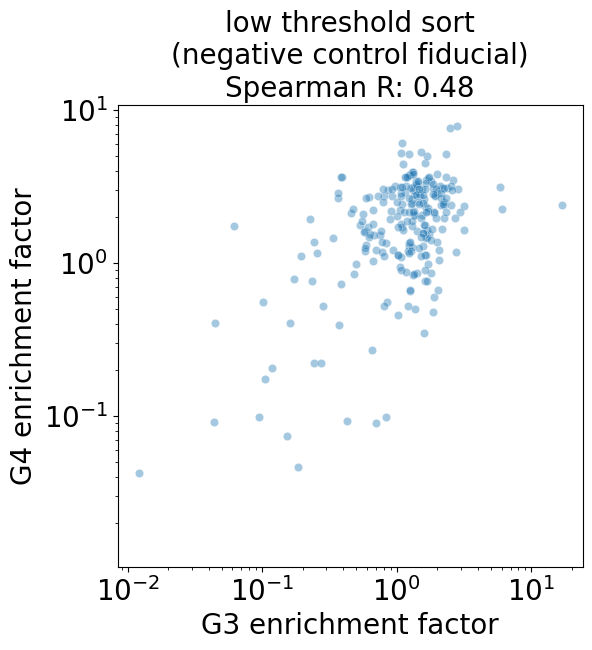

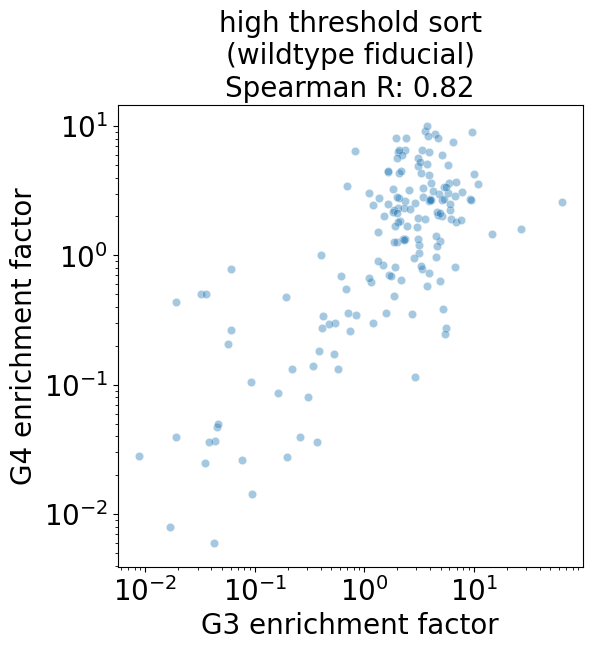

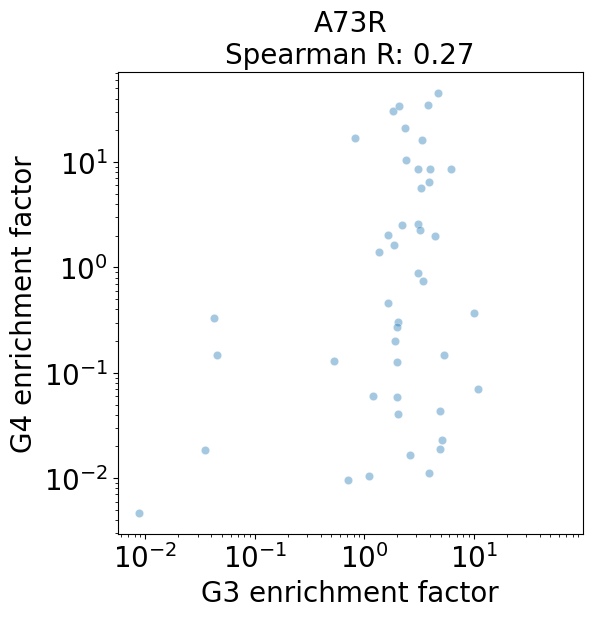

In [31]:
for fiducial in ['neg_control', 'wt', 'a73r']:
  g3_col = utils.get_enrichment_factor_column_name('g3', fiducial)
  g4_col = utils.get_enrichment_factor_column_name('g4', fiducial)
  plt.figure(figsize=(6, 6))
  nodupdf = merge_efdf.drop_duplicates(subset='mutations')
  sns.scatterplot(nodupdf, x=g3_col, y=g4_col, alpha=0.4)
  res = scipy.stats.spearmanr(nodupdf[g3_col], nodupdf[g4_col])
  plt.title(fiducial_to_title[fiducial] + '\n' + f'Spearman R: {res.correlation:0.2f}')
  plt.yscale('log')
  plt.xscale('log')
  plt.xlabel('G3 enrichment factor')
  plt.ylabel('G4 enrichment factor')
  plotting.set_fontsize(plt.gca(), 20)
  plt.show()

## g2 vs g3

In [32]:
g2g3efdf = g2_efdf[g2_cols].merge(g3_efdf[g3_cols], on='mutations', how='inner', suffixes=('_g2', '_g3'))

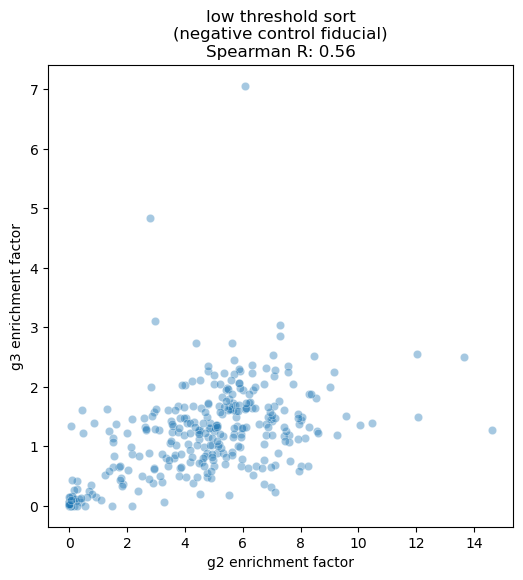

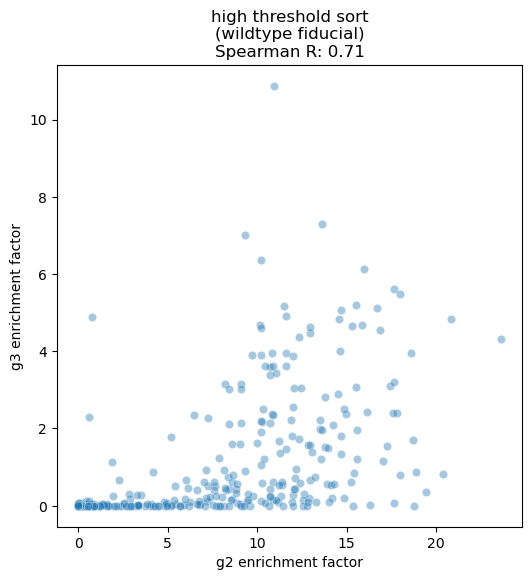

In [33]:
for fiducial in ['neg_control', 'wt']:
  g3_col = utils.get_enrichment_factor_column_name('g3', fiducial)
  g2_col = utils.get_enrichment_factor_column_name('g2', fiducial)
  plt.figure(figsize=(6, 6))
  nodupdf = g2g3efdf.drop_duplicates(subset='mutations')
  sns.scatterplot(data=nodupdf, x=g2_col, y=g3_col, alpha=0.4)
  plt.title(fiducial_to_title[fiducial])
  res = scipy.stats.spearmanr(nodupdf[g2_col], nodupdf[g3_col])
  plt.title(fiducial_to_title[fiducial] + '\n' + f'Spearman R: {res.correlation:0.2f}')
  plt.xlabel('g2 enrichment factor')
  plt.ylabel('g3 enrichment factor')
  plt.show()

In [34]:
fiducial = 'neg_control'
pd.crosstab(g2g3df[f'activity_greater_than_{fiducial}_g3'], g2g3df[f'activity_greater_than_{fiducial}_g2'])

activity_greater_than_neg_control_g2,False,True
activity_greater_than_neg_control_g3,,
False,37,10
True,5,276


In [35]:
fiducial = 'wt'
pd.crosstab(g2g3df[f'activity_greater_than_{fiducial}_g3'], g2g3df[f'activity_greater_than_{fiducial}_g2'])

activity_greater_than_wt_g2,False,True
activity_greater_than_wt_g3,,
False,133,65
True,9,121


## Within generation correlation

Text(0.5, 1.0, 'Spearman R: 0.71')

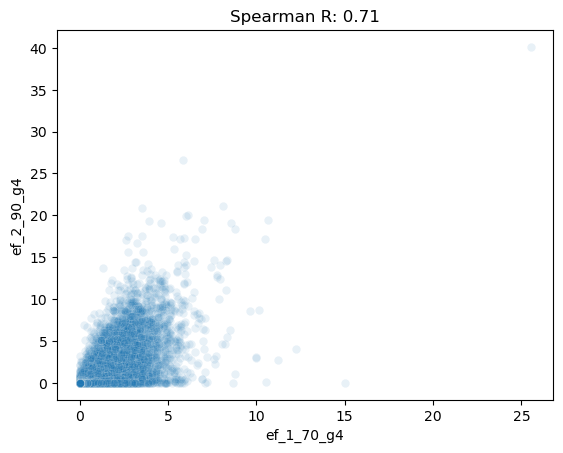

In [36]:
g4_neg_control_column = utils.get_enrichment_factor_column_name('g4', 'neg_control')
g4_wt_column = utils.get_enrichment_factor_column_name('g4', 'wt')

sns.scatterplot(data=g4_efdf, x=g4_neg_control_column, y=g4_wt_column, alpha=0.1)
result = scipy.stats.spearmanr(g4_efdf[g4_neg_control_column], g4_efdf[g4_wt_column])
plt.title(f'Spearman R: {result.correlation:0.2f}')

# Gate saturation (fiducial example)

In [37]:
# load g4 data
all_df = utils.load_all_data(data_dir=DATA_DIR)
g4_df = all_df[all_df['generation'] == 'g4']

In [38]:
# load synonym dfs
generation = 'g4'
stopdf = utils.load_fiducial_data('neg_control', generation, DATA_DIR).assign(source='neg_control')
wtdf = utils.load_fiducial_data('wt', generation, DATA_DIR).assign(source='wt')
a73rdf = utils.load_fiducial_data('a73r', generation, DATA_DIR).assign(source='a73r')
quaddf = utils.load_fiducial_data('a63p_a73r_d74h_i84y', generation, DATA_DIR).assign(source='a63p_a73r_d74h_i84y')

In [39]:
synonym_dfs = [stopdf, wtdf, a73rdf, quaddf]
for synonym_df in synonym_dfs:
  synonym_df['source'] = synonym_df['source'].str.upper().str.replace('_', ',')
  synonym_df['source'] = synonym_df['source'].apply(lambda s: 'neg. control' if s == 'NEG,CONTROL' else s)

gates = ['ef_1_70_g4', 'ef_2_90_g4', 'ef_4_99.5_g4']
gate_axis_labels = ['enrichment factor:\n70th percentile gate',
                    'enrichment factor:\n90th percentile gate',
                    'enrichment factor:\n99.5th percentile gate']

In [40]:
def make_plot(df, gate, x_axis_label, palette, bottom_of_top, top_of_bottom, num_bins=25):
  f, (ax_top, ax_bottom) = plt.subplots(
      ncols=1,
      nrows=2,
      sharex=True,
      figsize=(6, 4),
      gridspec_kw={'hspace': 0.2, 'height_ratios': [1, 5]},
  )
  sns.histplot(
      data=df,
      x=gate,
      hue='source',
      bins=num_bins,
      palette=palette,
      ax=ax_top,
  )
  sns.histplot(
      data=df,
      x=gate,
      hue='source',
      bins=num_bins,
      palette=palette,
      ax=ax_bottom,
  )

  ax_top.set_ylim(bottom=bottom_of_top)
  ax_bottom.set_ylim(0, top_of_bottom)

  sns.despine(ax=ax_bottom)
  sns.despine(ax=ax_top, bottom=True)

  # make the diagonal cut lines
  ax = ax_top
  d = 0.015  # how big to make the diagonal lines in axes coordinates
  # arguments to pass to plot
  kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
  ax.plot((-d, +d), (-d, -d), **kwargs)  # top-left diagonal
  plotting.set_fontsize(ax_top, 20)
  plotting.set_fontsize(ax_bottom, 20)

  ax2 = ax_bottom
  kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
  ax2.plot((-d, +d), (1, 1), **kwargs)  # bottom-left diagonal
  ax_bottom.set_xlabel(x_axis_label)

  # remove redundant legend, ylabel, and ticks
  ax_top.legend_.remove()
  ax_top.set_ylabel('')
  ax_top.tick_params(bottom=False)
  plt.show()

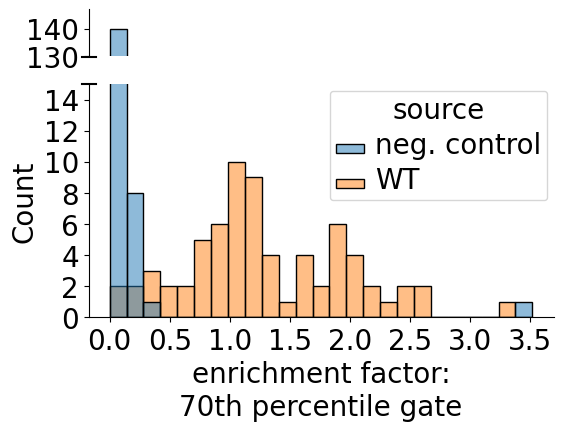

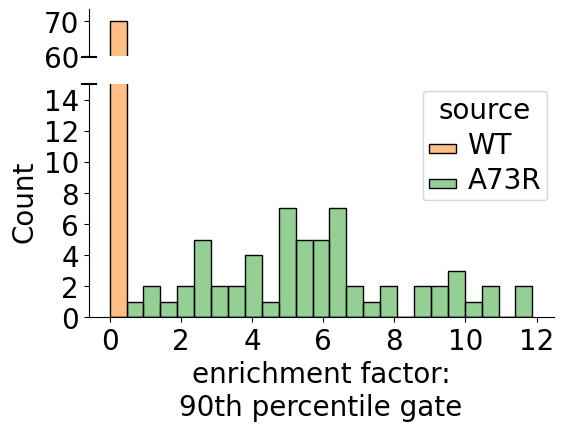

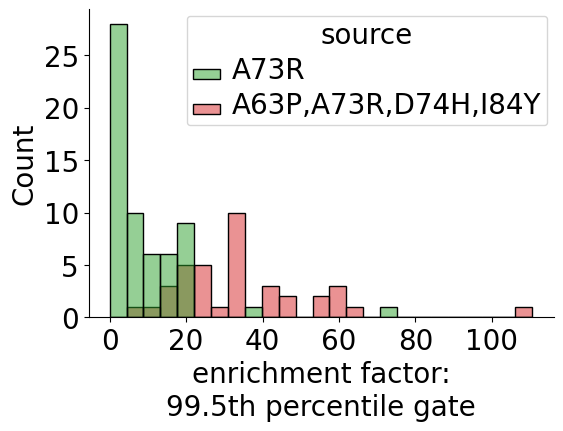

In [41]:
bottoms_of_tops = [130, 60, 20]
for i in range(3):
  plotdf = pd.concat([synonym_dfs[i], synonym_dfs[i + 1]])
  palette = [sns.color_palette()[i], sns.color_palette()[i + 1]]
  gate = gates[i]
  if i < 2:
    make_plot(plotdf, gate, gate_axis_labels[i], palette, bottom_of_top=bottoms_of_tops[i], top_of_bottom=15)
  else:
    fig = plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=plotdf, x=gates[i], bins=25, hue='source', palette=palette)
    plt.xlabel(gate_axis_labels[i])
    sns.despine(ax=ax)
    plotting.set_fontsize(ax, 20)


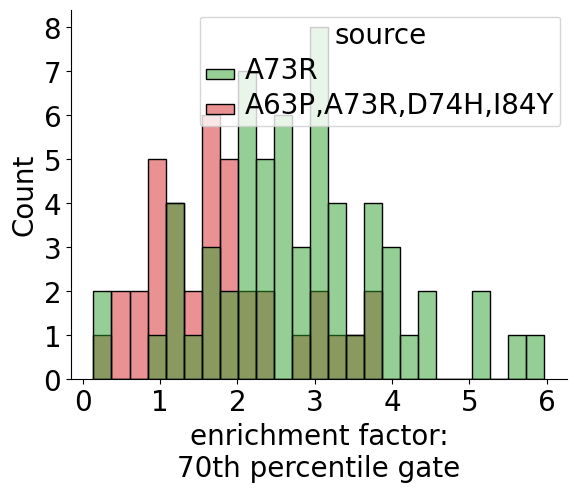

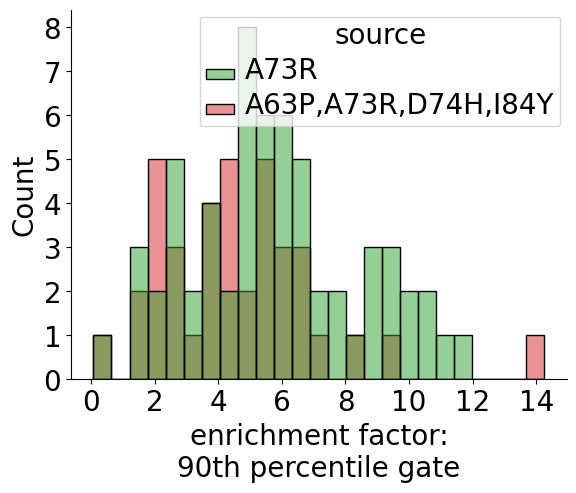

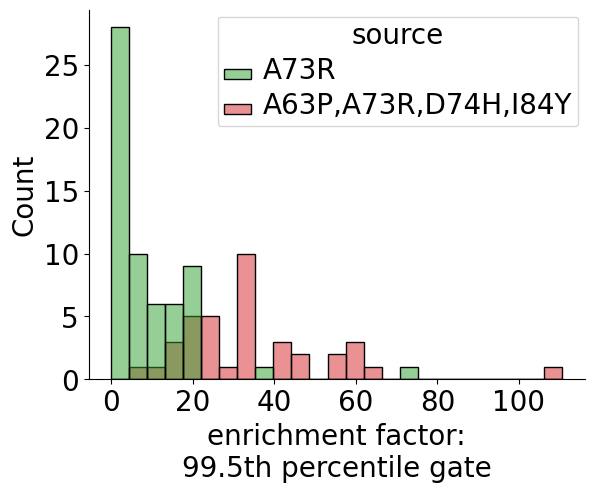

In [42]:
i = 2
plotdf = pd.concat([synonym_dfs[i], synonym_dfs[i + 1]])
palette = [sns.color_palette()[i], sns.color_palette()[i + 1]]
for j in range(3):
  gate = gates[j]
  ax = sns.histplot(
      data=plotdf,
      x=gate,
      bins=25,
      hue='source',
      palette=palette,
  )
  ax.set_xlabel(gate_axis_labels[j])
  sns.despine(ax=ax)
  plotting.set_fontsize(ax, 20)
  plt.show()

# Purified protein slope estimation

In [43]:
import xml.etree.ElementTree as ET
from scipy import stats
import numpy as np

## Constants

In [44]:
RANDOM_SEED = 0
DEFAULT_NUM_BOOTSTRAPS = 1000
RANDOM_STATE = np.random.RandomState(RANDOM_SEED)

In [45]:
DATA_DIR = constants.DATA_DIR

## Helper fns

In [46]:
def parse_activity_df_from_xml(activity_path):
  with utils.open_file(activity_path, 'rb', DATA_DIR) as f:
    tree = ET.parse(f)
    root = tree.getroot()

  well_dfs = []
  for sections in root.iter('PlateSection'):
      if (sections.attrib['Name'] != 'Plate1'):
        raise ValueError(f'Unexpected Plate {sections.attrib["Name"]}')
      for well  in sections.iter('Well'):
          fluorescence = pd.Series(well.find('RawData').text.split(), dtype=float)
          time = pd.Series(well.find('TimeData').text.split(), dtype=float) / 60  # seconds to minutes
          well = well.get('Name')
          well_dfs.append(pd.DataFrame({'well': well, 'fluorescence': fluorescence, 'time': time}))
  return pd.concat(well_dfs, ignore_index=True)


In [47]:
# The number of points used here is to guarantee that we are measuring
# initial velocity in the linear regime of the reaction
# See https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4692135/ "Properties and mechanisms of enzyme action"
# for details
def add_initial_velocity(df, num_points=10):
  df = df.sort_values(by=['time'], ascending=True)
  x = df['time'][:num_points]
  y = df['fluorescence'][:num_points]

  result = stats.linregress(x, y, alternative='two-sided')

  slope_stderr = result.stderr
  slope = result.slope
  return pd.Series({'initial_velocity': slope, 'initial_velocity_stderr': slope_stderr, 'intercept': result.intercept})

# The wildtype is a particularly slow reaction, so we have many more points in
# the linear regime.
def add_initial_velocity_wrapper(df):
  if df.genotype.unique().item() == 'wild type':
    return add_initial_velocity(df, num_points=100)
  else:
    return add_initial_velocity(df)

def parametric_resample_row(row, random_state, n_bootstraps):
  mean = row['initial_velocity']
  stdev = row['initial_velocity_stderr']
  return random_state.normal(loc=mean, scale=stdev, size=n_bootstraps)

def get_bootstrapped_initial_velocity_df(df, random_state, n_bootstraps=DEFAULT_NUM_BOOTSTRAPS):
  return df.apply(parametric_resample_row, axis=1, random_state=random_state, n_bootstraps=n_bootstraps)


## Read in plate data

In [48]:
with utils.open_file(constants.PLATE_GENOTYPES_PATH, 'r', DATA_DIR) as f:
  genotypes_df = pd.read_csv(f)

In [49]:
platemap = {
    'O403':  ['A1', 'A2', 'A3', 'A4'],
    'O1757': ['C1', 'C2', 'C3', 'C4'],
    'O2360': ['E1', 'E2', 'E3', 'E4'],
    'O3188': ['G1', 'G2', 'G3', 'G4'],
    'O3459': ['I1', 'I2', 'I3', 'I4'],
    'O3512': ['K1', 'K2', 'K3', 'K4'],
    'O3513': ['M1', 'M2', 'M3', 'M4'],
    'O4060': ['O1', 'O2', 'O3', 'O4'],
}

well_to_strain = {}
for strain, wells in platemap.items():
  for well in wells:
    well_to_strain[well] = strain

well_to_concentration = {}
for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'O']:
  for concentration, column in zip([100, 50, 25, 12.5], ['1', '2', '3', '4']):
    well_to_concentration[''.join([row, column])] = concentration

In [50]:
df = parse_activity_df_from_xml(constants.TIME_SERIES_ACTIVITY_XML_PATH)
df['strain'] = df['well'].apply(well_to_strain.get)
df.dropna(subset=['strain'], inplace=True)
df = df[df['strain'] != 'O403']  # Removing WT assessed in a different background strain
df = df.merge(genotypes_df, how='left', on='strain')
df['concentration'] = df['well'].apply(well_to_concentration.get)

## Compute enzyme reaction rate

### Example of fitting reaction trajectory in linear regime

In [51]:
slope = add_initial_velocity(df[df.well == 'K1'])['initial_velocity']
stderr = add_initial_velocity(df[df.well == 'K1'])['initial_velocity_stderr']
intercept = add_initial_velocity(df[df.well == 'K1'])['intercept']

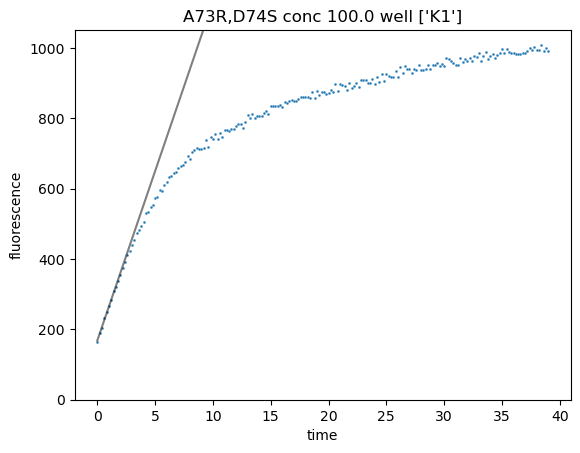

In [52]:
plotdf = df[(df['well'] == 'K1')]
sns.scatterplot(data=plotdf, x='time', y='fluorescence', s=4)
plt.ylim(bottom=0)
plt.plot(plotdf.time, intercept + slope * plotdf.time, 'black', alpha=0.5, label='initial velocity fit')
plt.title(f'{plotdf.genotype.iloc[0]} conc {plotdf.concentration.iloc[0]} well {plotdf["well"].unique()}')
plt.show()

## Add bootstrapped estimates of the rate

In [53]:
initial_velocity_df = df.groupby(['strain', 'genotype', 'concentration'], group_keys=True).apply(add_initial_velocity_wrapper).reset_index()
initial_velocity_df['initial_velocity_resampled'] = get_bootstrapped_initial_velocity_df(initial_velocity_df, RANDOM_STATE)
bootstrapped_initial_velocity_df = initial_velocity_df.explode('initial_velocity_resampled')

/var/folders/x_/g9qv4tyj4kd1m4zrz61_t4700000gn/T/ipykernel_3368/3321433837.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  initial_velocity_df = df.groupby(['strain', 'genotype', 'concentration'], group_keys=True).apply(add_initial_velocity_wrapper).reset_index()


In [54]:
bootstrapped_initial_velocity_df.head()

,strain,genotype,concentration,initial_velocity,initial_velocity_stderr,intercept,initial_velocity_resampled
0,O1757,wild type,12.5,1.003808,0.025534,127.776027,1.048852
0,O1757,wild type,12.5,1.003808,0.025534,127.776027,1.014026
0,O1757,wild type,12.5,1.003808,0.025534,127.776027,1.028799
0,O1757,wild type,12.5,1.003808,0.025534,127.776027,1.061027
0,O1757,wild type,12.5,1.003808,0.025534,127.776027,1.051494


## Purified Protein Plot

In [55]:
genotype_to_library = {
    'wild type': 'WT',
    'A73R': 'epPCR',
    'A73R,D74S': 'ML2',
    'A63P,A73R,D74H,I84Y': 'ML3',
    'A63S,D64S,A73R': 'DE3',
    'D64A,A73R': 'ML2B',  # Also ML2
    'A63S,A132P': 'DE3B', # Internal DE. (sorted from OB174)
}
genotype_order = ('wild type', 'A73R', 'A73R,D74S', 'A63S,D64S,A73R', 'A63P,A73R,D74H,I84Y')
library_order = tuple(genotype_to_library[genotype] for genotype in genotype_order)

custom_palette = (plotting.WT_COLOR, plotting.EPPCR_COLOR, plotting.ML2_COLOR, plotting.DE3_COLOR, plotting.ML3_COLOR)

In [56]:
# add fields
bootstrapped_initial_velocity_df['activity'] = bootstrapped_initial_velocity_df['initial_velocity_resampled']
bootstrapped_initial_velocity_df['library'] = bootstrapped_initial_velocity_df.genotype.apply(genotype_to_library.get)

# remove other genotypes
bootstrapped_initial_velocity_df = bootstrapped_initial_velocity_df[bootstrapped_initial_velocity_df.genotype.isin(genotype_order)]

In [57]:
bootstrapped_initial_velocity_df.genotype.unique()

array(['wild type', 'A73R', 'A73R,D74S', 'A63P,A73R,D74H,I84Y',
       'A63S,D64S,A73R'], dtype=object)

In [58]:
def get_activity_relative_to_wt(df):
  wt_activities = df[df.genotype == 'wild type']['activity'].sample(n=len(df.activity), replace=True)
  df['fold_change_activity'] = df['activity'] / wt_activities.values
  return df

In [59]:
normalized_df = bootstrapped_initial_velocity_df.groupby(by='concentration', group_keys=False).apply(get_activity_relative_to_wt)

/var/folders/x_/g9qv4tyj4kd1m4zrz61_t4700000gn/T/ipykernel_3368/3233985347.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = bootstrapped_initial_velocity_df.groupby(by='concentration', group_keys=False).apply(get_activity_relative_to_wt)


/Users/nthomas/git/nuclease_design/nuclease_design/plotting.py:328: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Text(0.5, 0, '')

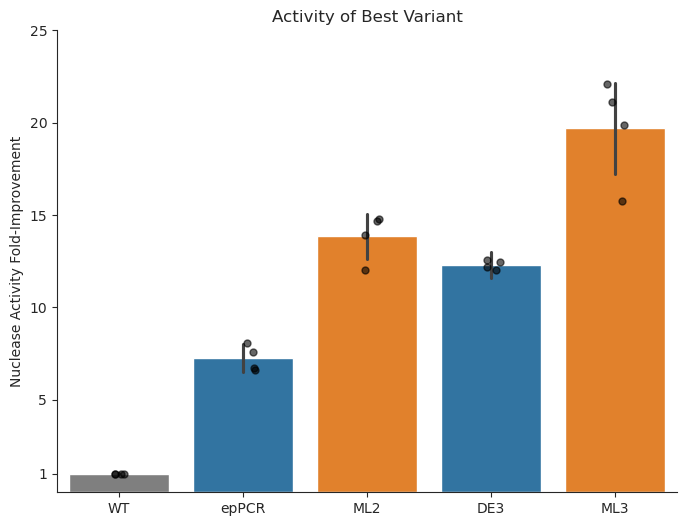

In [60]:
plt.figure(figsize=(8, 6))
ax = plotting.plot_purified_protein_activity(
    normalized_df,
    library_order=library_order,
    custom_palette=custom_palette,
)

points_df = (
    normalized_df.groupby(by=['genotype', 'concentration'])
    .agg({'fold_change_activity': 'mean'})
    .reset_index()
)
points_df['library'] = points_df.genotype.apply(genotype_to_library.get)
sns.stripplot(
    data=points_df,
    x='library',
    y='fold_change_activity',
    order=library_order,
    marker='o',
    facecolors='black',
    edgecolor='black',
    linewidth=1,
    alpha=0.6,
    ax=ax,
)
plt.xlabel('')

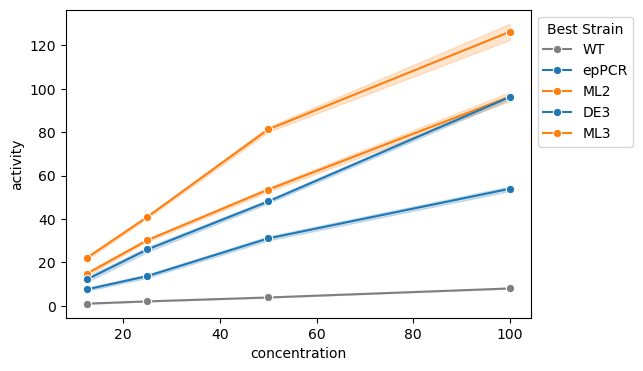

In [61]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(
    data=normalized_df,
    x='concentration',
    y='activity',
    hue='library',
    errorbar='sd',
    err_style='band',
    hue_order=library_order,
    marker='o',
    palette=custom_palette,
)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
ax.get_legend().set_title('Best Strain')

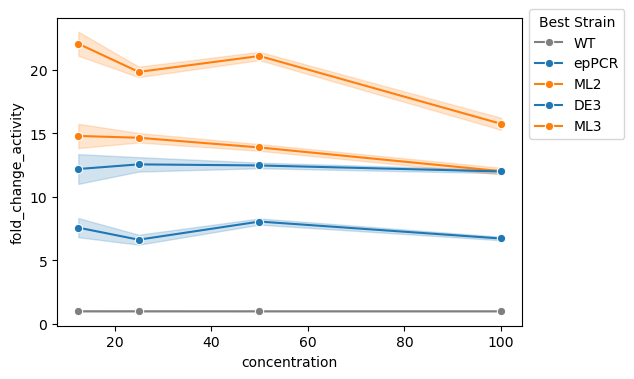

In [62]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(
    data=normalized_df,
    x='concentration',
    y='fold_change_activity',
    hue_order=library_order,
    errorbar='sd',
    err_style='band',
    hue='library',
    marker='o',
    palette=custom_palette,
)
plt.legend(bbox_to_anchor=[1.0, 1.05])
ax.get_legend().set_title('Best Strain')

## Permutation test

Test whether the fold_change_activity is greater for ML3 than DE3

In [63]:
initial_velocity_df = df.groupby(['strain', 'genotype', 'concentration'], group_keys=True).apply(add_initial_velocity_wrapper).reset_index()
initial_velocity_df['activity'] = initial_velocity_df['initial_velocity']
initial_velocity_df['library'] = initial_velocity_df.genotype.apply(genotype_to_library.get)
normalized_no_bootstrap_df = initial_velocity_df.groupby(by='concentration', group_keys=False).apply(get_activity_relative_to_wt)

/var/folders/x_/g9qv4tyj4kd1m4zrz61_t4700000gn/T/ipykernel_3368/665084691.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  initial_velocity_df = df.groupby(['strain', 'genotype', 'concentration'], group_keys=True).apply(add_initial_velocity_wrapper).reset_index()
/var/folders/x_/g9qv4tyj4kd1m4zrz61_t4700000gn/T/ipykernel_3368/665084691.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_no_boo

In [64]:
normalized_no_bootstrap_df[normalized_no_bootstrap_df['library'].isin(['DE3', 'ML3', 'WT'])][['library', 'concentration', 'fold_change_activity']]

,library,concentration,fold_change_activity
0,WT,12.5,1.000000
1,WT,25.0,1.000000
2,WT,50.0,1.000000
3,WT,100.0,1.000000
20,ML3,12.5,22.020532
21,ML3,25.0,19.834930
22,ML3,50.0,21.092215
23,ML3,100.0,15.763609
24,DE3,12.5,12.184114
25,DE3,25.0,12.572068


In [65]:
de3_fold_changes = normalized_no_bootstrap_df[normalized_no_bootstrap_df['library'] == 'DE3']['fold_change_activity'].values

In [66]:
ml3_fold_changes = normalized_no_bootstrap_df[normalized_no_bootstrap_df['library'] == 'ML3']['fold_change_activity'].values

In [67]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

statistic(de3_fold_changes, ml3_fold_changes, axis=0)

-7.367076192596496

In [68]:
# Taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html
# because our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = stats.permutation_test(
    (de3_fold_changes, ml3_fold_changes),
    statistic,
    vectorized=True,
    n_resamples=np.inf,
    alternative='less',
)

In [69]:
print(res.statistic)

-7.367076192596496


In [70]:
print(res.pvalue)

0.014285714285714285


In [71]:
stats.ttest_ind(de3_fold_changes, ml3_fold_changes)

TtestResult(statistic=-5.31700848204106, pvalue=0.0018003144928412486, df=6.0)

### Account for uncertainty in slope estimation

We can do the same permutation test on our parametric bootstrap resamples of

$ \text{fold change activity} = \dfrac{\text{initial velocity A}} {\text{initial velocity WT}} $

where both the distribution of the numerator and denominator are modeled as Gaussian

<Axes: xlabel='fold_change_activity', ylabel='Count'>

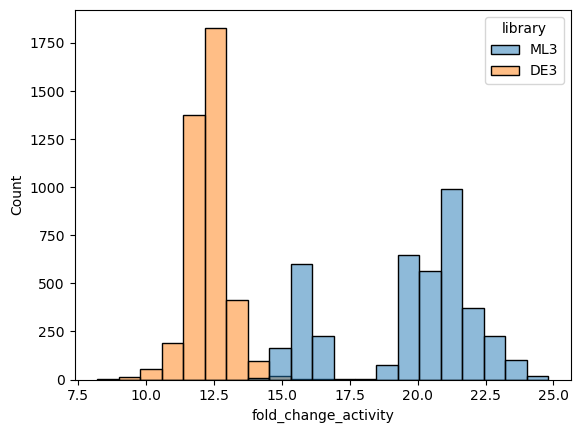

In [72]:
sns.histplot(data=normalized_df[normalized_df['library'].isin(['DE3', 'ML3'])], hue='library', x='fold_change_activity')

In [73]:
de3_fold_changes_resampled = normalized_df[normalized_df['library'] == 'DE3']['fold_change_activity'].values

In [74]:
ml3_fold_changes_resampled = normalized_df[normalized_df['library'] == 'ML3']['fold_change_activity'].values

### Dependence of test statistic on the # of boostrap replicates?

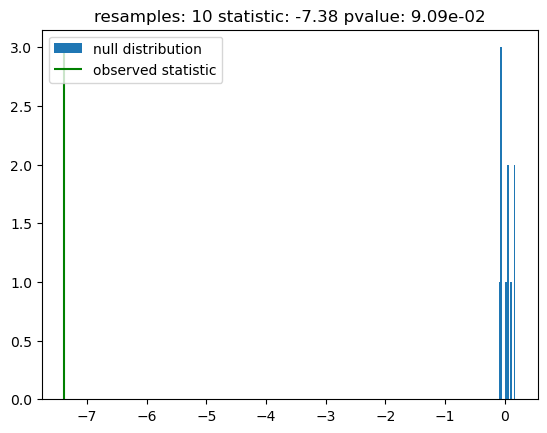

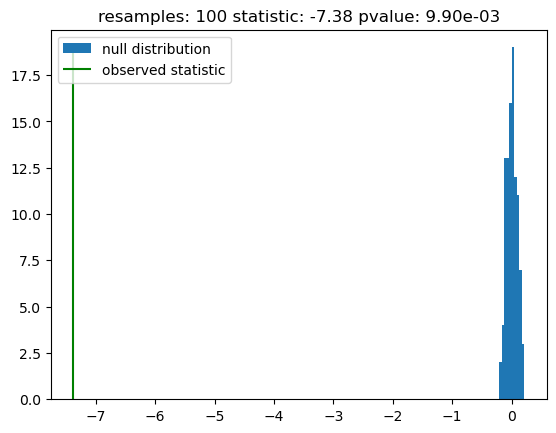

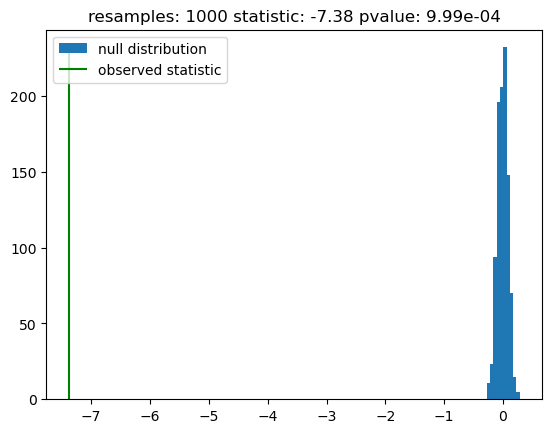

In [85]:
for n_resamples in [10, 100, 1000]:
  res = stats.permutation_test(
      (de3_fold_changes_resampled, ml3_fold_changes_resampled),
      statistic,
      vectorized=True,
      n_resamples=n_resamples,
      alternative='less',
      permutation_type='independent'
  )
  n, _, _ = plt.hist(res.null_distribution, label='null distribution')
  plt.title(f'resamples: {n_resamples} statistic: {res.statistic:.2f} pvalue: {res.pvalue:0.2e}')
  plt.vlines(x=res.statistic, ymin=0, ymax=np.max(n), label='observed statistic', color='green')
  plt.legend()
  plt.show()

This dependence on the number of permutation test resamples is due to the test statistic being so significant that our numerical approximation of the p-value breaks down. This is clearly a significant difference.

## All initial velocity plots

In [76]:
def make_initial_velocity_plot(df, genotype, concentration):
    genotype_df = df[
        (df['genotype'] == genotype) & (df['concentration'] == concentration)
    ]
    wtdf = df[
        (df['genotype'] == 'wild type') & (df['concentration'] == concentration)
    ]
    genotype_slope = add_initial_velocity_wrapper(genotype_df)['initial_velocity']
    genotype_intercept = add_initial_velocity_wrapper(genotype_df)['intercept']

    wt_slope = add_initial_velocity_wrapper(wtdf)['initial_velocity']
    wt_intercept = add_initial_velocity_wrapper(wtdf)['intercept']

    sns.scatterplot(
        data=pd.concat([genotype_df, wtdf]),
        x='time',
        y='fluorescence',
        s=8,
        alpha=0.5,
        hue='genotype',
        hue_order=['wild type', genotype],
    )
    plt.legend()

    wt_args = (wt_slope, wt_intercept, wtdf)
    genotype_args = (genotype_slope, genotype_intercept, genotype_df)
    for i, args in enumerate([wt_args, genotype_args]):
      slope, intercept, plotdf = args
      plt.plot(
          plotdf.time,
          intercept + slope * plotdf.time,
          alpha=0.2,)

    plt.ylim(bottom=0)
    plt.title(
        f'{genotype} conc {concentration} ng/mL well'
        f' {genotype_df["well"].unique()}'
    )
    plt.xlabel('time (min)')
    plt.xlim(left=0, right=40)
    # 2 minutes is what we used for slope estimation, 20 minutes is what we used for WT
    plt.xticks([0, 2, 10, 20, 30, 40])
    plt.show()


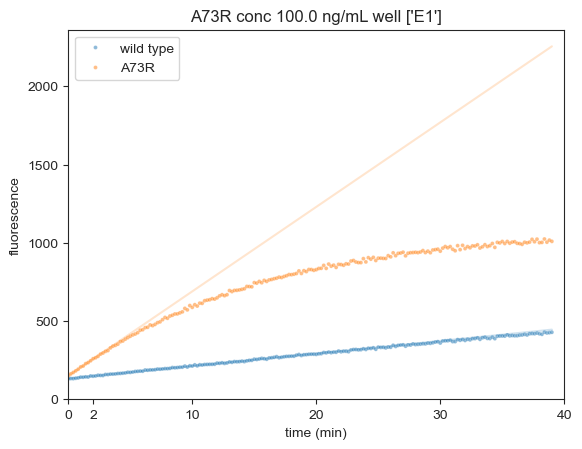

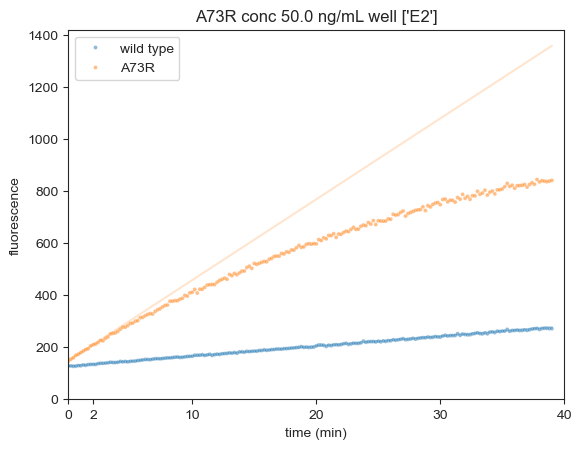

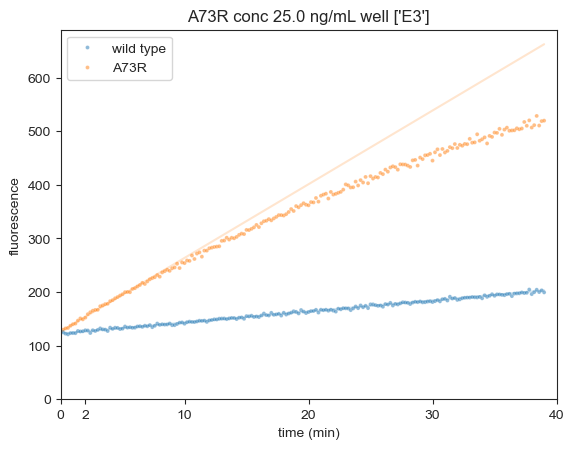

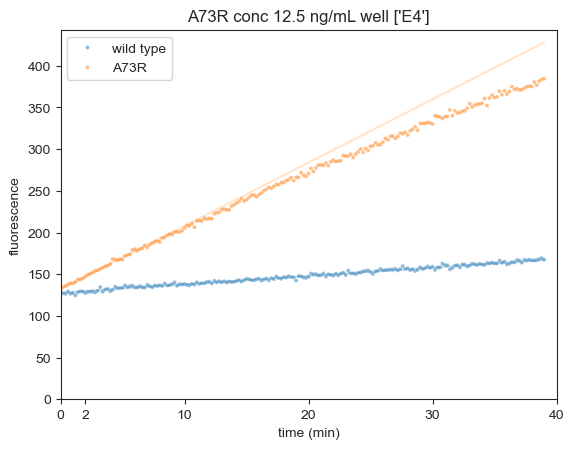

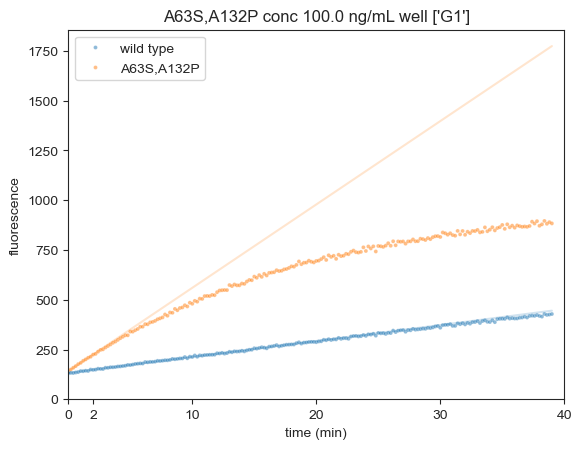

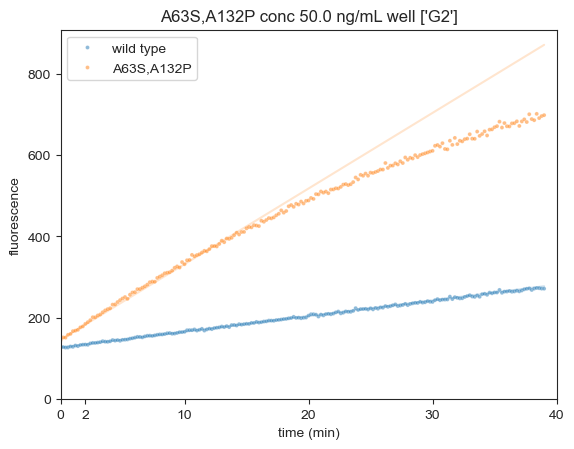

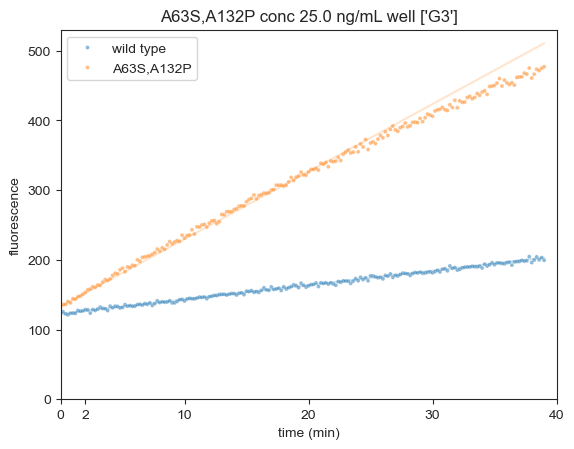

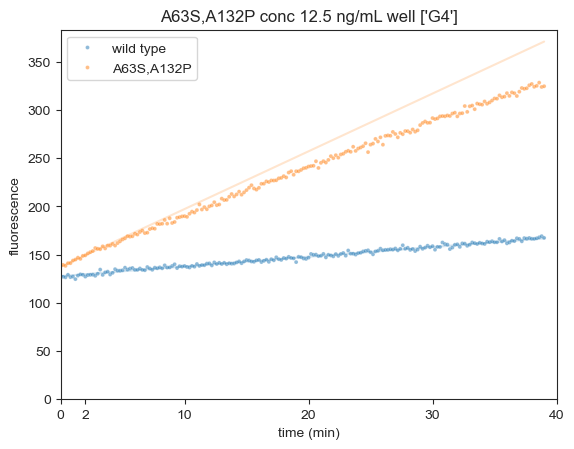

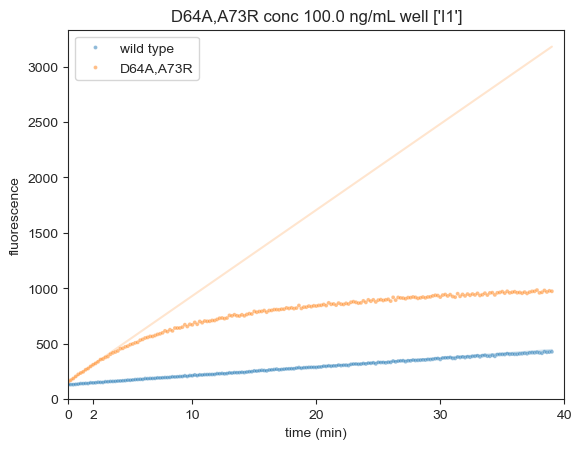

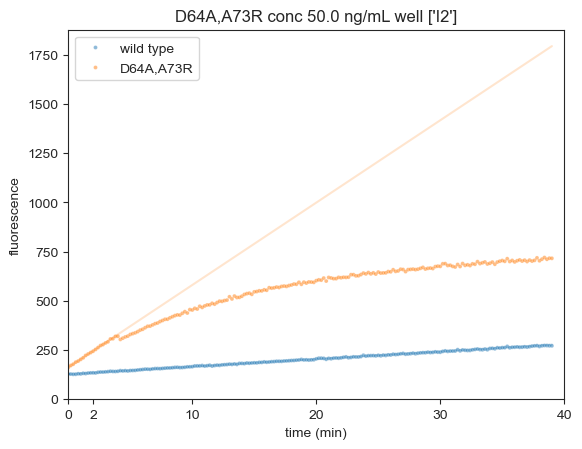

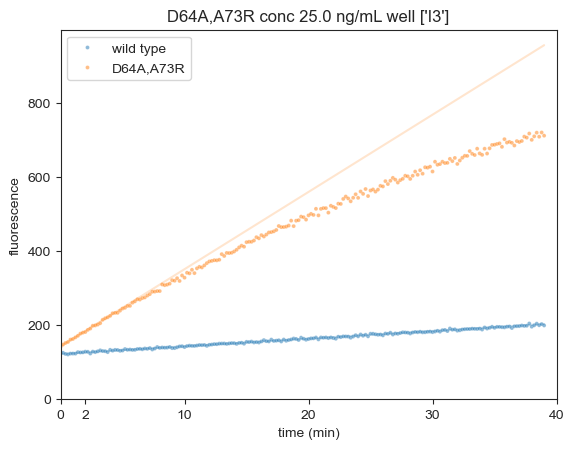

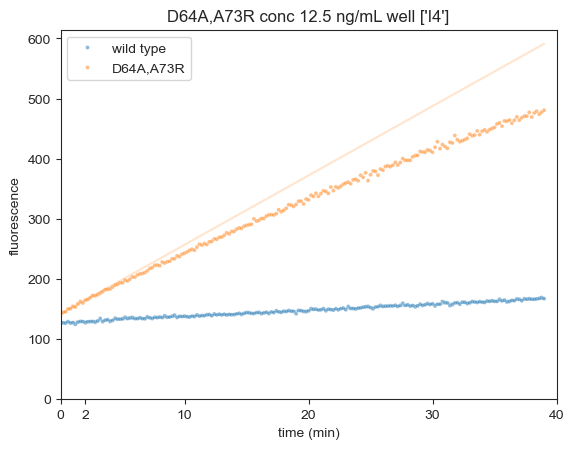

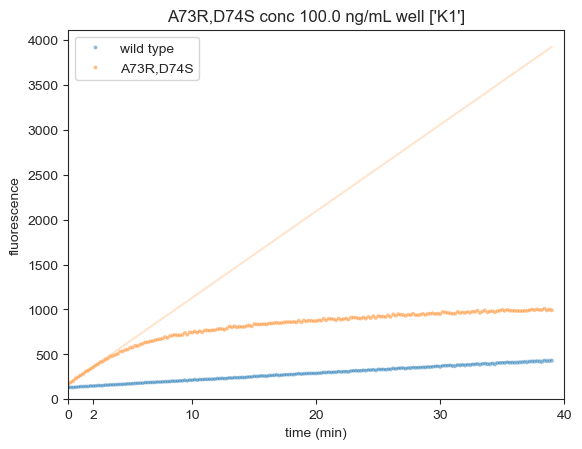

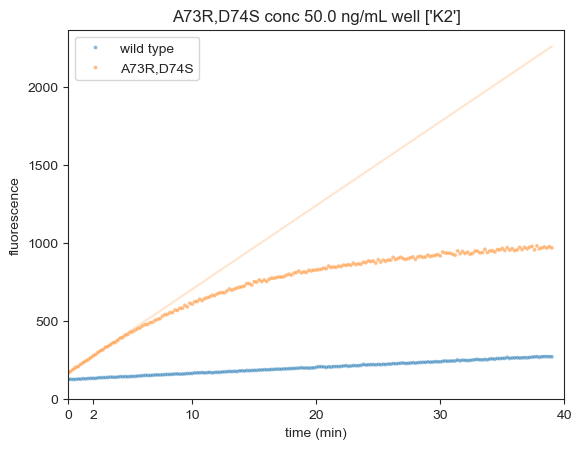

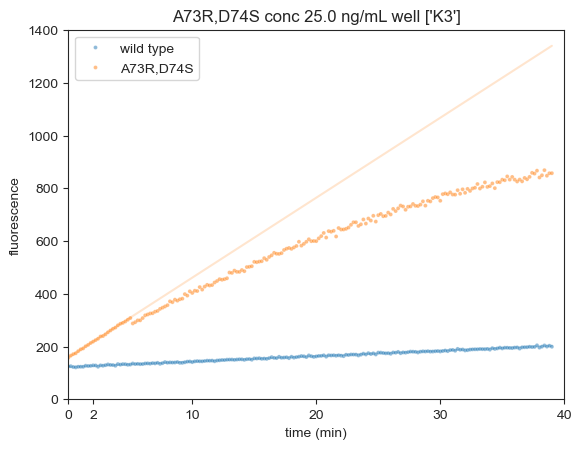

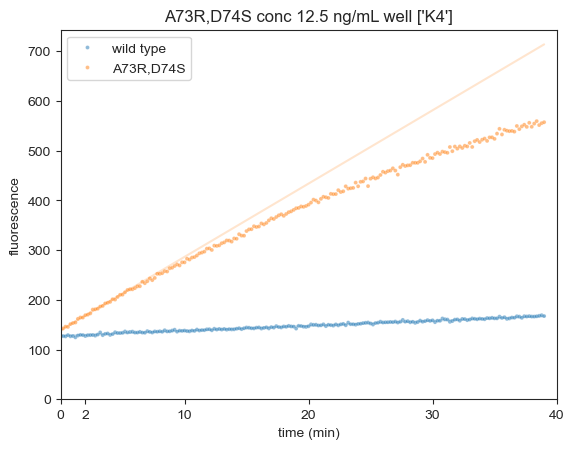

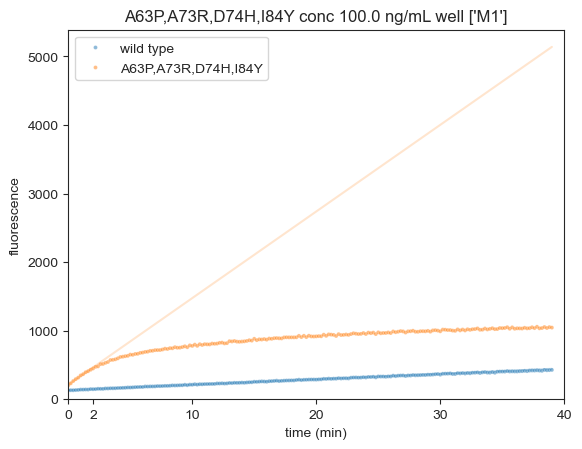

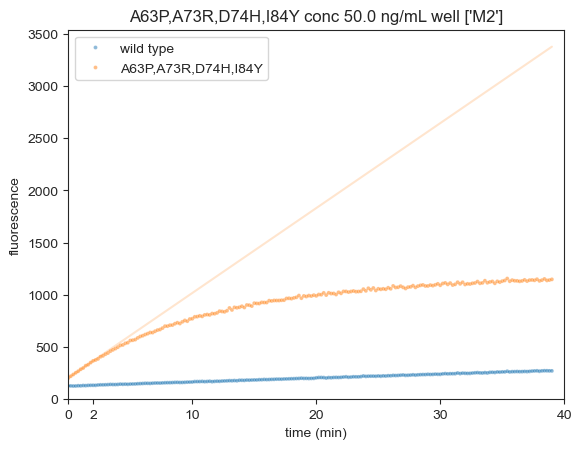

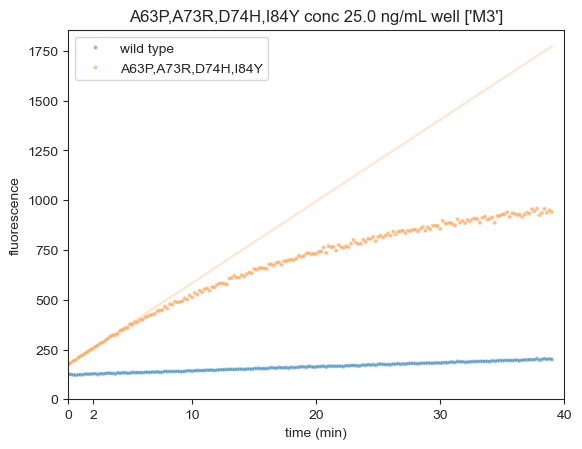

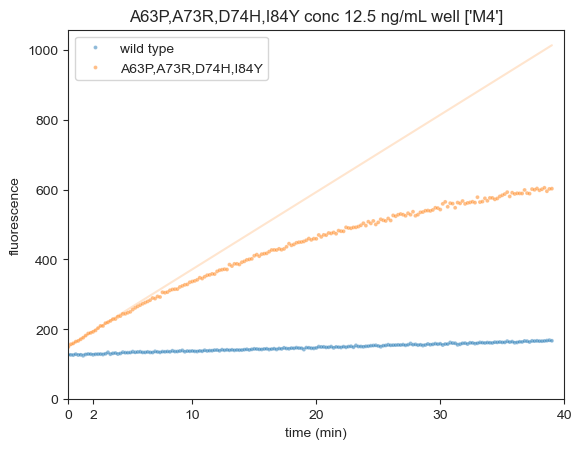

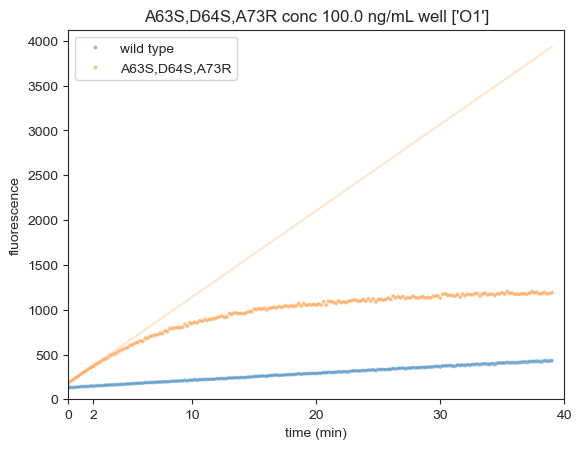

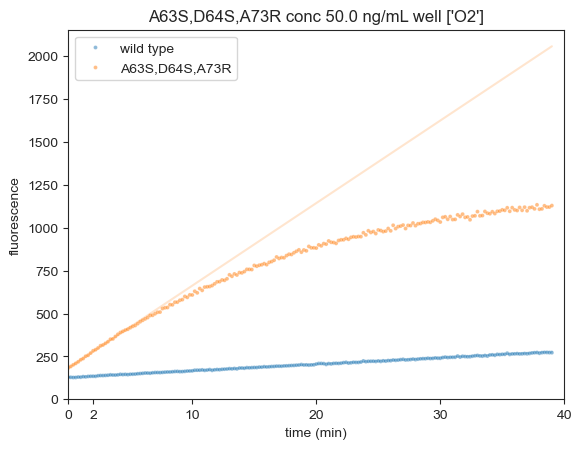

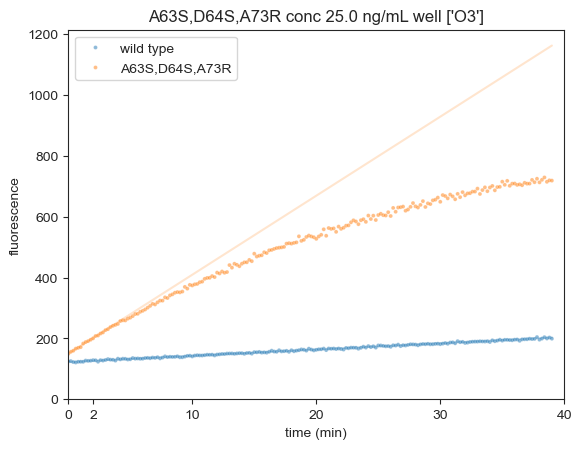

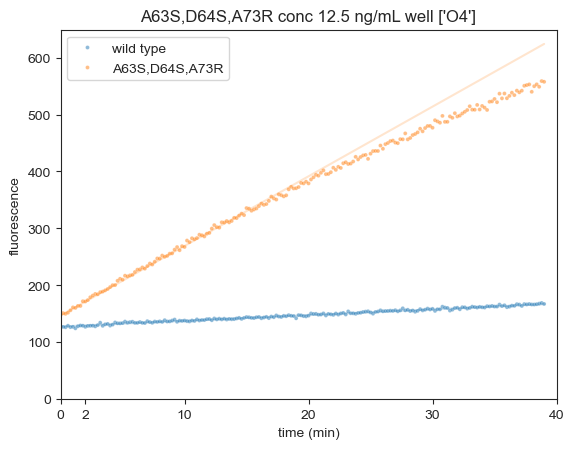

In [77]:
for genotype in df['genotype'].unique():
  for concentration in df['concentration'].unique():
    if genotype == 'wild type':
      continue
    with sns.axes_style('ticks'):
      make_initial_velocity_plot(df, genotype, concentration)

# Undesigned variants

"XXX of YYY variants were not designed"

In [78]:
%%time
all_data_df = utils.load_all_data(DATA_DIR)

CPU times: user 847 ms, sys: 149 ms, total: 996 ms
Wall time: 7.16 s


In [79]:
df = utils.expand_sublibraries(all_data_df)

In [80]:
all_unmatched_df = all_data_df[all_data_df['sublibrary_names'].isin([('g2_unmatched',), ('g3_unmatched', ), ('g4_unmatched', )])]

In [81]:
all_unmatched_df['sublibrary_names'].value_counts()

sublibrary_names
(g3_unmatched,)    7796
(g2_unmatched,)    4365
(g4_unmatched,)    2360
Name: count, dtype: int64